### 4. Discounting Strategy Analysis

This section evaluates the effectiveness of promotional activities and their impact on sales volume and net revenue. The main goal is to understand if discounts are a primary driver of demand or if the business relies heavily on full-price sales. The key analyses performed are:

1. Creating Discount Categories: Transactions are segmented into distinct buckets: No Discount (0%), Low Discount (5%-10%), and High Discount (15%-30%) to determine the proportion of sales in each range
2. Sales Trend by Discount Category: This analysis tracks the Units Sold for each discount category across the years (2022–2024) to observe sales patterns and the growth or decline of discounted vs. non-discounted sales over time

#### 4.1 Creating Discount Categories

In [10]:
# Function to bucket the discount percentage

def discount_bucket(x):
    if x == 0:
        return "No Discount (0%)"
    elif 5 <= x <= 10:
        return "Low Discount (5%-10%)"
    elif 15 <= x <= 30:
        return "High Discount (15%-30%)"
    else:
        return "Other"

# Apply the function to create a new categorical column
df["discount_category_bucket"] = df["discount_pct"].apply(discount_bucket)

print(df["discount_category_bucket"].value_counts(normalize=True).mul(100).round(1))

discount_category_bucket
No Discount (0%)           70.0
Low Discount (5%-10%)      16.1
High Discount (15%-30%)    13.9
Name: proportion, dtype: float64


#### 4.2 Sales Trend by Discount Category


 Units Sold by Discount Category and Year: 
Year                        2022    2023    2024   Total
discount_category_bucket                                
High Discount (15%-30%)    33045   32797   33140   98982
Low Discount (5%-10%)      36790   37489   36392  110671
No Discount (0%)          160002  157805  158688  476495


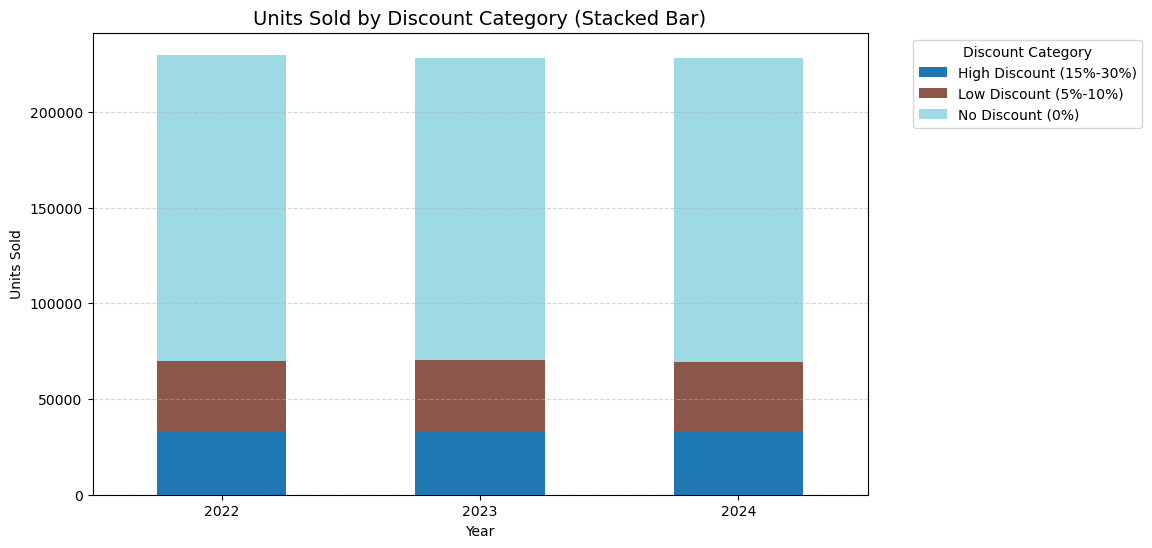

In [11]:
# Discounting analysis across Years in Units Sold
t_bct = df.groupby(["discount_category_bucket", "Year"])["units_sold"].sum().unstack(fill_value=0)
t_bct["Total"] = t_bct.sum(axis=1)

print("\n Units Sold by Discount Category and Year: ")
print(t_bct)

# Visualization: Discount Category Sales
t_bct_plot = t_bct.drop(columns=['Total']).T
t_bct_plot.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
plt.title('Units Sold by Discount Category (Stacked Bar)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Units Sold')
plt.xticks(rotation=0)
plt.legend(title='Discount Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# Observation:
# Discounting did not have a significant impact on driving sales, suggesting strong product demand even at full price 
# 70% sales were made at full price
# High Discounting (15%-30%) observed an increase in sales from 2023 to 2024
# 14% contribution in units sold, from 15%-30% discounting in 2024

#### 4.3 High Discount (15-30%) Performance by Region

In [12]:
# Filter data for the High Discount segment
hda = df[df["discount_category_bucket"] == "High Discount (15%-30%)"]

# Units Sold under High Discount by Region and Year
high_discount_units = hda.groupby(["region", "Year"])["units_sold"].sum().unstack(fill_value=0)
high_discount_units["Total"] = high_discount_units.sum(axis=1)
high_discount_units = high_discount_units.sort_values(by="Total", ascending=False)

print("\n High Discount (15%-30%) Units Sold by Region: ")
print(high_discount_units)

# Net Revenue generated under High Discount by Region and Year
high_discount_revenue = hda.groupby(["region", "Year"])["net_revenue"].sum().unstack(fill_value=0)
high_discount_revenue["Total"] = high_discount_revenue.sum(axis=1)
high_discount_revenue = high_discount_revenue.sort_values(by="Total", ascending=False)

print("\n High Discount (15%-30%) Net Revenue by Region: ")
print(high_discount_revenue.applymap(lambda x: f'{x:,.2f}'))

# Observation: 
# Discount-led campaigns are driving strong demand and revenue in the **South** and **East** regions
# Western and Northern regions show weaker traction, suggesting high discounts may be less effective there


 High Discount (15%-30%) Units Sold by Region: 
Year    2022  2023   2024  Total
region                          
South   9997  9994  10345  30336
East    9686  9724   9889  29299
North   6597  6572   6748  19917
West    6765  6507   6158  19430

 High Discount (15%-30%) Net Revenue by Region: 
Year          2022        2023        2024         Total
region                                                  
South   386,814.97  392,603.79  405,765.49  1,185,184.25
East    372,649.53  373,816.74  398,512.17  1,144,978.44
West    277,611.63  254,954.79  249,198.82    781,765.24
North   248,494.93  258,617.71  259,994.48    767,107.12


#### 4.4 High Discount (15-30%) Performance by Category

In [51]:
# Units Sold under High Discount by Category and Year
high_discount_category = hda.groupby(["category", "Year"])["units_sold"].sum().unstack(fill_value=0)
high_discount_category["Total"] = high_discount_category.sum(axis=1)
high_discount_category = high_discount_category.sort_values(by="Total", ascending=False)

print("\nHigh Discount (15%-30%) Units Sold by Category: ")
print(high_discount_category)


# Net Revenue generated under High Discount by Category and Year
high_discount_revenue_category = hda.groupby(["category", "Year"])["net_revenue"].sum().unstack(fill_value=0)
high_discount_revenue_category["Total"] = high_discount_revenue_category.sum(axis=1)
high_discount_revenue_category = high_discount_revenue_category.sort_values(by="Total", ascending=False)

print("\n High Discount (15%-30%) Net Revenue by Category: ")
print(high_discount_revenue_category.applymap(lambda x: f'{x:,.2f}'))


# Observation: 
# **Clothing** and **Home** sales surged from 2023-24. However their respective revenues witnessed a decline in the same period


High Discount (15%-30%) Units Sold by Category: 
Year          2022   2023   2024  Total
category                               
Clothing     11469  10994  11319  33782
Home          9625   9763   9812  29200
Electronics   6781   6987   6856  20624
Beauty        2841   2762   2771   8374
Sports        2329   2291   2382   7002

 High Discount (15%-30%) Net Revenue by Category: 
Year               2022        2023        2024         Total
category                                                     
Clothing     544,207.38  531,858.64  559,734.20  1,635,800.22
Home         231,413.34  231,842.62  229,595.17    692,851.13
Electronics  192,582.78  201,845.72  193,090.40    587,518.90
Beauty       188,687.78  183,064.14  198,164.02    569,915.94
Sports       128,679.78  131,381.91  132,887.17    392,948.86
